<center><h1 style="background-color:#f2f2f2; padding:10px;">Retail Pricing Optimization</h1></center>

**Introduction:**

Retail price optimization is crucial for maximizing profits while maintaining competitiveness in the market. It involves setting prices strategically based on various factors such as competitor analysis, customer segmentation, and price testing. By analyzing historical data and market trends, retailers can identify the most appropriate price points that attract customers and drive sales while maximizing profit margins.


**Let's Get Started:**

In this Analysis, we will cover:

- Exploratory Data Analysis (EDA) on Retail data with several products, including:
  - Competitor Analysis
  - Correlation Analysis
  - Month-wise Sales Analysis
- Feature Engineering
- Regression Model for predicting Optimal Prices

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
import shap
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

<center><h2>Loading Data</h2></center>

In [154]:
data = pd.read_csv('retail_price.csv')
data.head(5).T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [155]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [156]:
# Checking for missing values
any(data.isna().sum() > 0)

False

In [157]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


<center><h2> Exploratory Data Analysis (EDA)</h2><center>

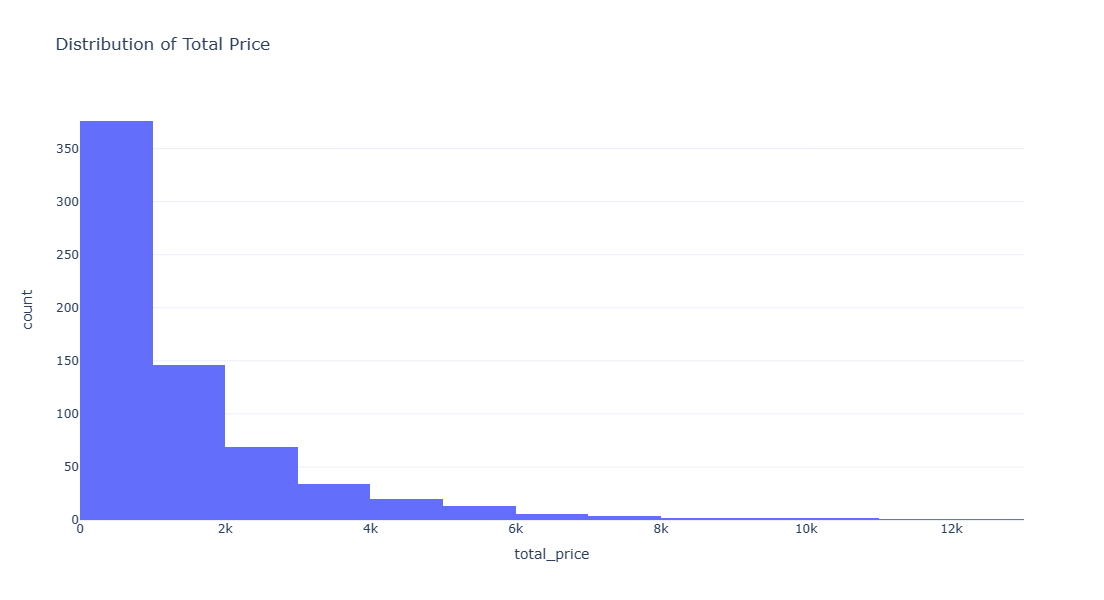

In [158]:
# Distribution of Total Price
fig = px.histogram(data, x='total_price', nbins=20, title='Distribution of Total Price',width=1000,height=600)
fig.show()

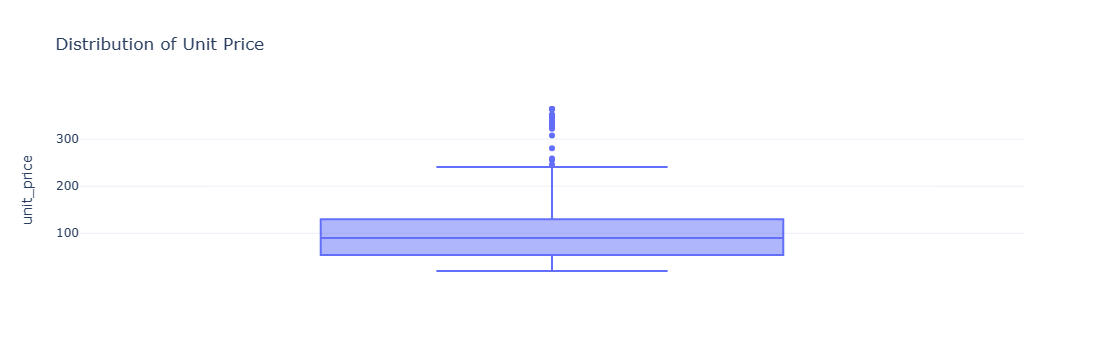

In [159]:
# Distribution of Unit Price
fig = px.box(data, y='unit_price', title='Distribution of Unit Price')
fig.show()

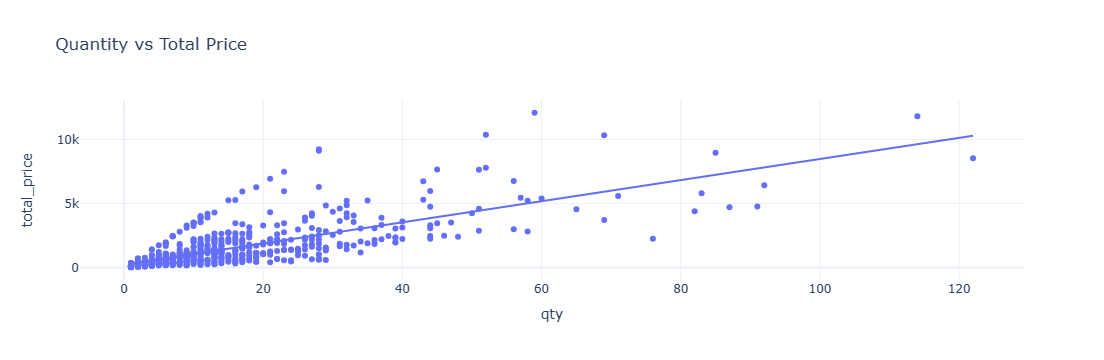

In [160]:
# Scatter plot of Quantity vs Total Price
fig = px.scatter(data, x='qty', y='total_price', trendline='ols', title='Quantity vs Total Price')
fig.show()

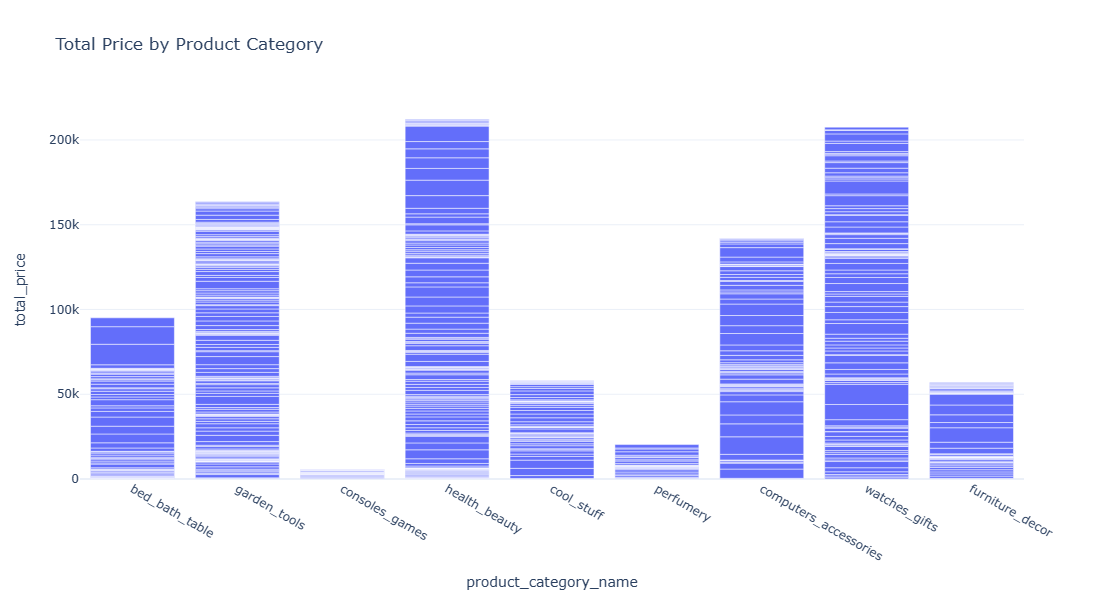

In [161]:
# Bar plot of Total Price by Product Category
fig = px.bar(data, x='product_category_name', y='total_price', title='Total Price by Product Category',width=1000,height=600)
fig.show()

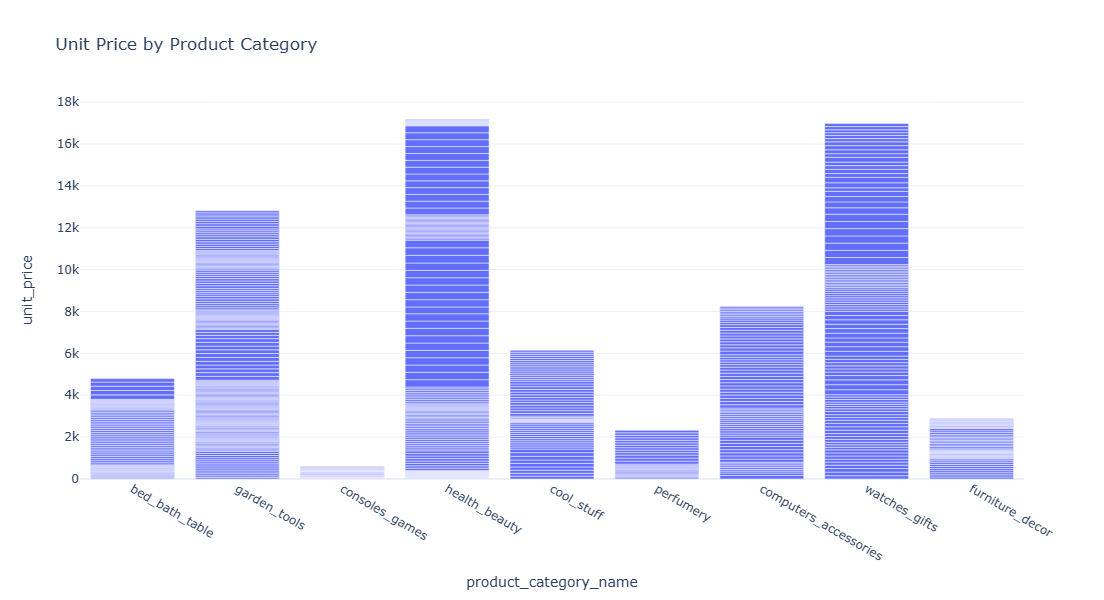

In [162]:
# Bar plot of Unit Price by Product Category
fig = px.bar(data, x='product_category_name', y='unit_price', title='Unit Price by Product Category',width=1000,height=600)
fig.show()

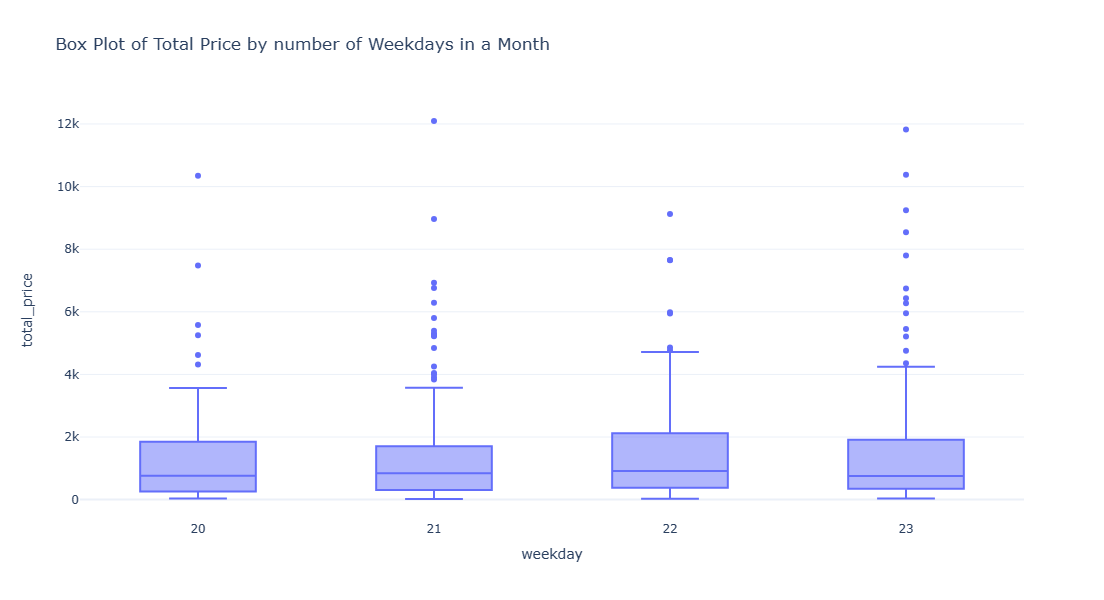

In [163]:
# Box plot of Total Price by number of Weekdays in a Month
fig = px.box(data, x='weekday', y='total_price', title='Box Plot of Total Price by number of Weekdays in a Month',width=1000,height=600)
fig.show()

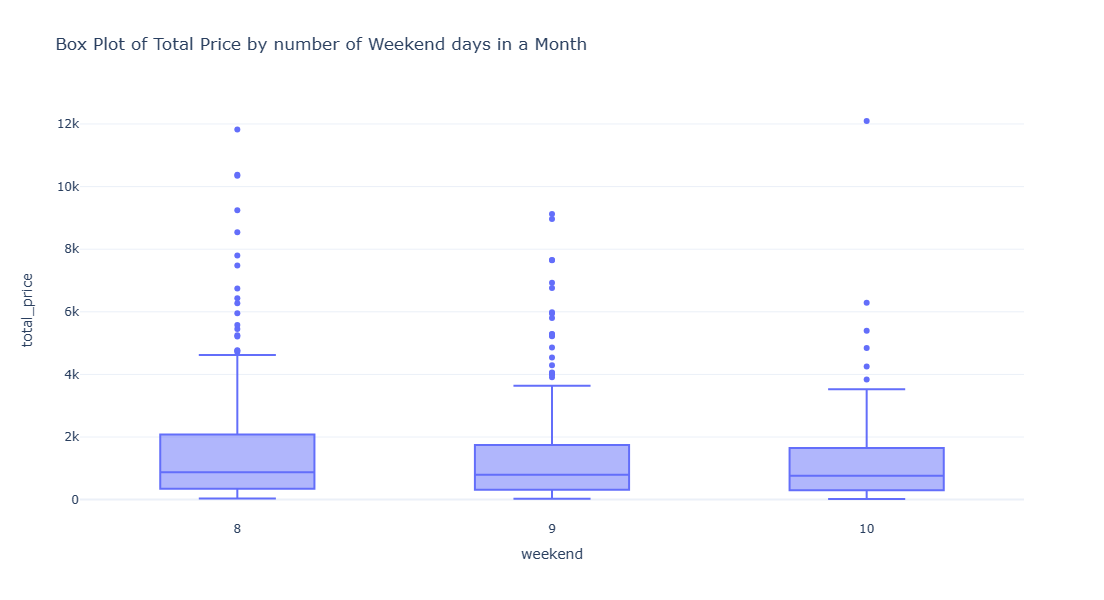

In [164]:
# Box plot of Total Price by number of Weekend days in a Month
fig = px.box(data, x='weekend', y='total_price', title='Box Plot of Total Price by number of Weekend days in a Month',width=1000,height=600)
fig.show()

<h2 align="center">Competitor Analysis</h2>

Competitor analysis is an essential part of retail pricing optimization. In this section, we will:
- Compare our product prices with those of competitors to identify pricing gaps.
- Visualize competitor price differences using various charts and plots.

In [165]:
# Calculating price differences with competitors
data['comp1_diff'] = data['unit_price'] - data['comp_1']
data['comp2_diff'] = data['unit_price'] - data['comp_2']
data['comp3_diff'] = data['unit_price'] - data['comp_3']


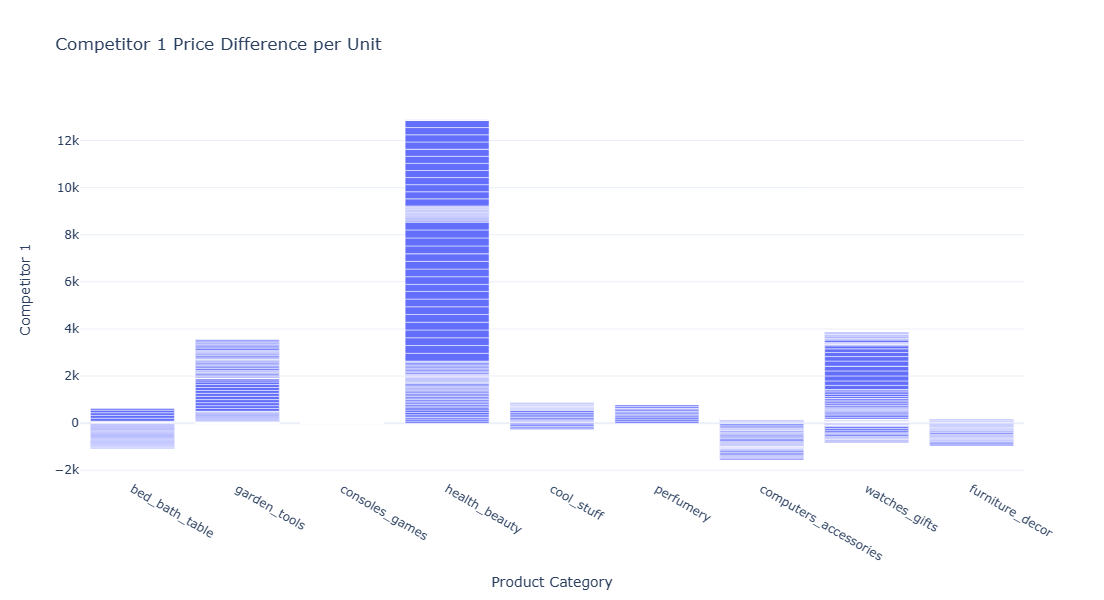

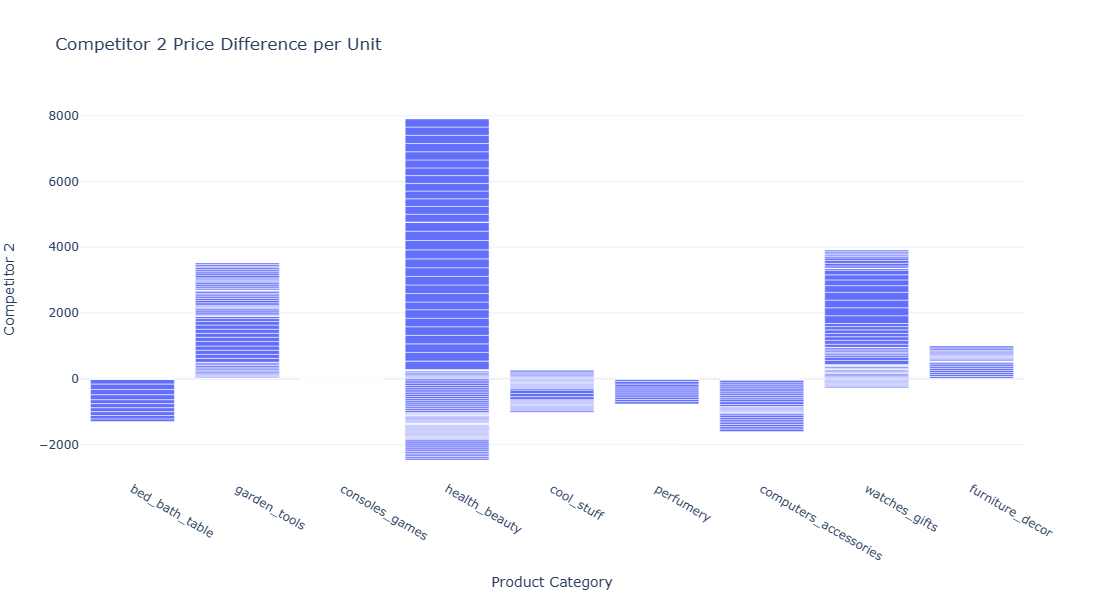

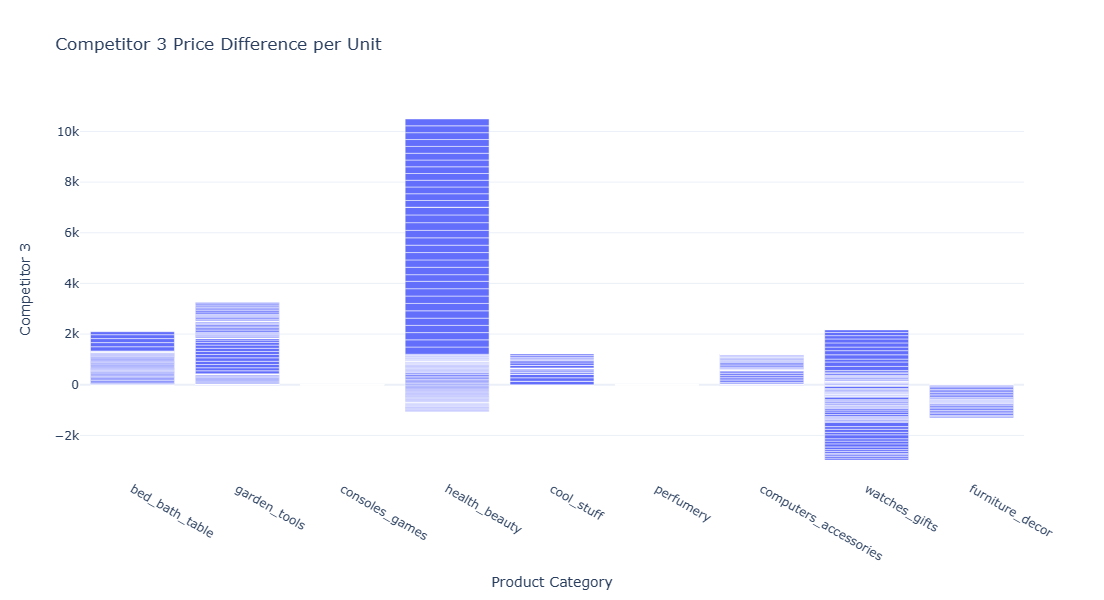

In [166]:
# Visualizing competitor price differences
for i in range(1, 4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'], y=data[comp], title=f"Competitor {i} Price Difference per Unit",
                 labels={'x': 'Product Category', 'y': f'Competitor {i}'}, width=800, height=600)
    fig.show()

**Freight Price**

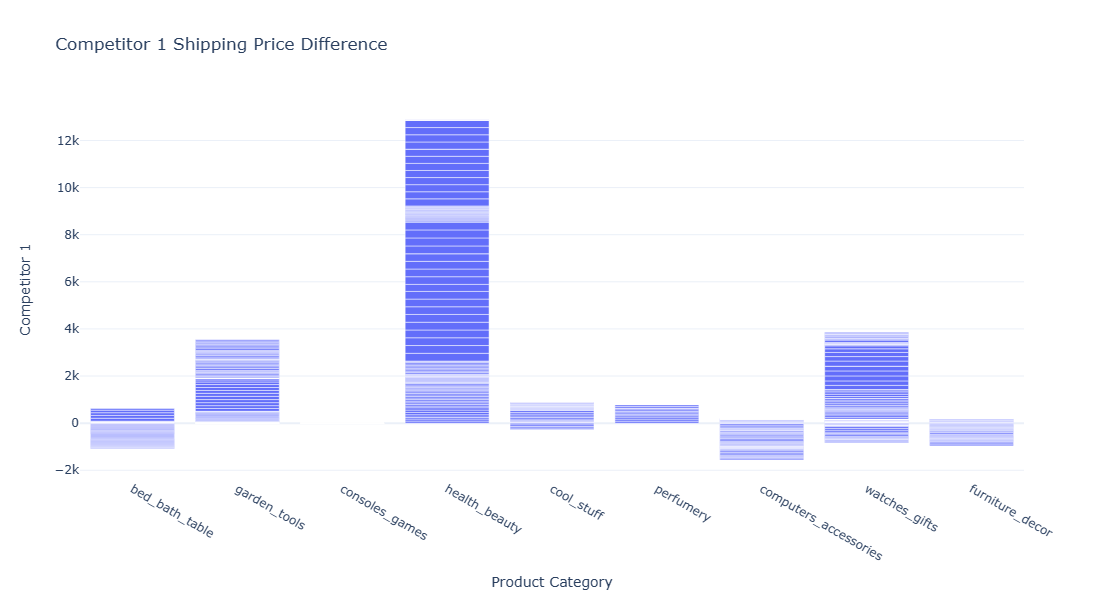

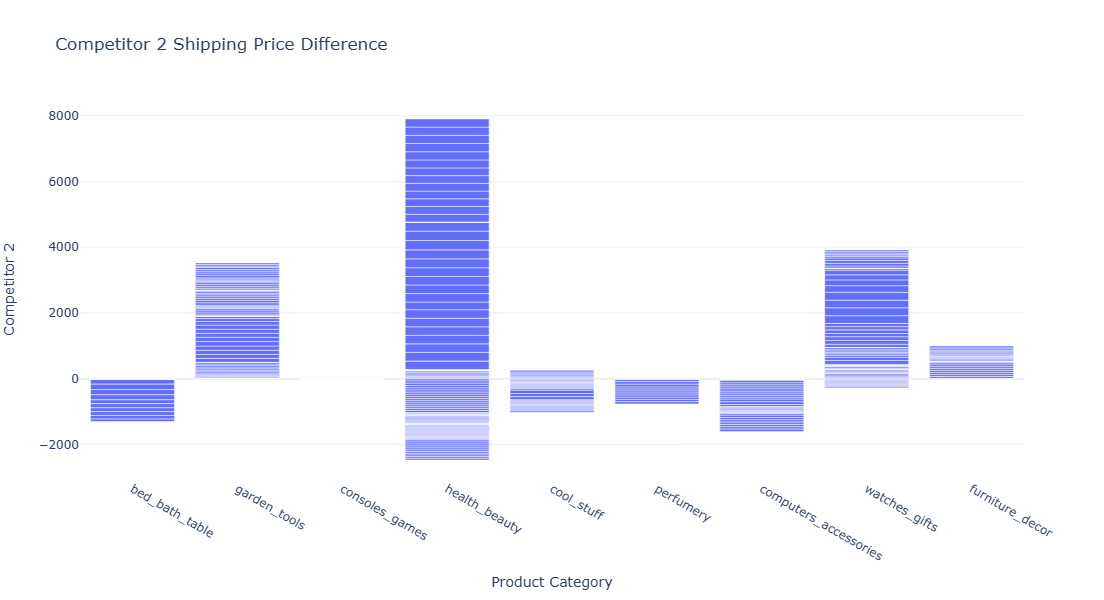

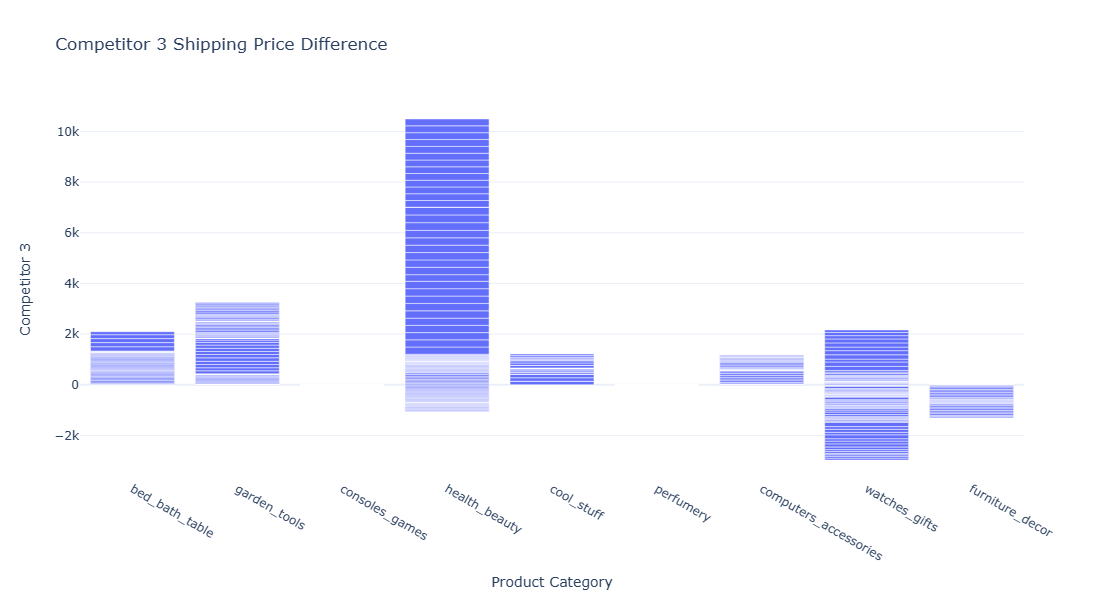

In [167]:
data['fp1_diff'] = data['freight_price'] - data['fp1']
data['fp2_diff'] = data['freight_price'] - data['fp2']
data['fp3_diff'] = data['freight_price'] - data['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=data['product_category_name'],y=data[comp],title=f"Competitor {i} Shipping Price Difference",
                 labels={'x': 'Product Category','y': f'Competitor {i}'}, width=800,height=600)
    fig.show()

<h2 align="center">Correlation Analysis with Unit Price</h2>

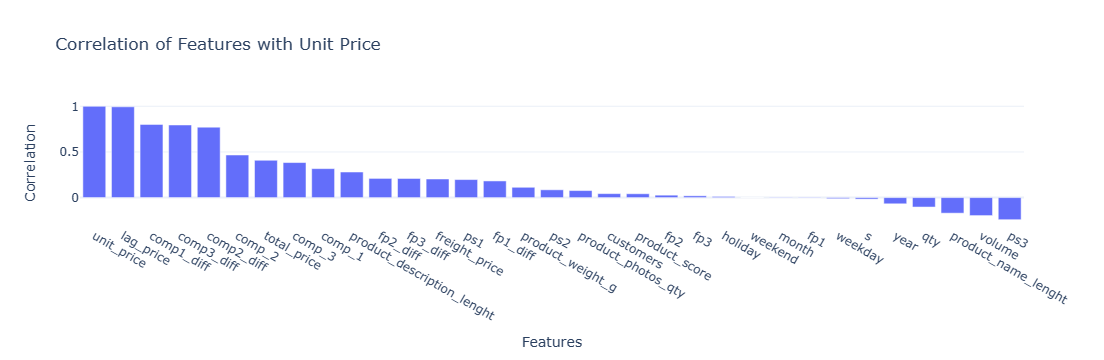

In [168]:
# Correlation Analysis with Unit Price
numeric_data = data.select_dtypes(include='number')
corrs = numeric_data.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values, title='Correlation of Features with Unit Price',
             labels={'x': 'Features', 'y': 'Correlation'})
fig.show()

<h2 align="center">Month-wise Sales Analysis</h2>

In [169]:
# Aggregating data on a monthly basis
monthly_data = data.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_data['month_year'] = pd.to_datetime(monthly_data['month_year'], format='%d-%m-%Y')
monthly_data = monthly_data.sort_values(by='month_year')

In [170]:
monthly_data.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


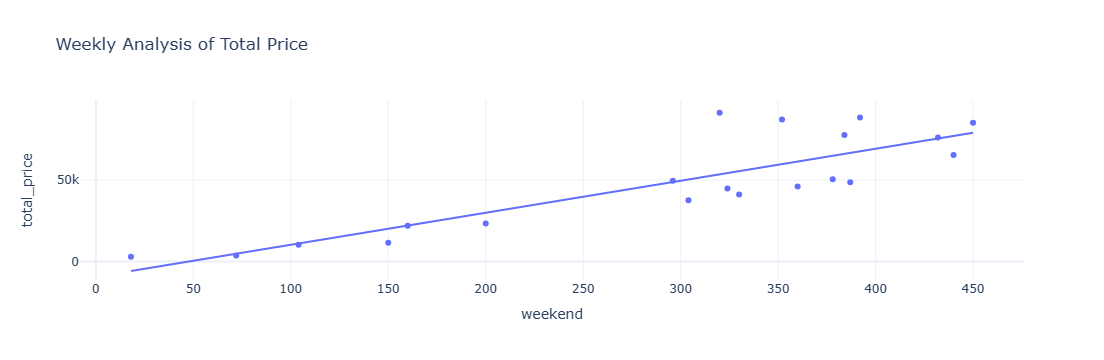

In [171]:
# Scatter plot of Weekly Analysis of Total Price
fig = px.scatter(monthly_data, x='weekend', y='total_price', trendline='ols',
                 title='Weekly Analysis of Total Price')
fig.show()

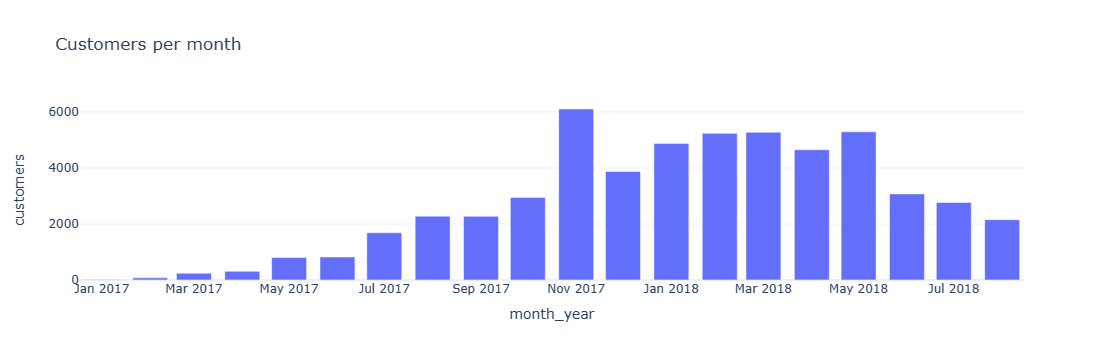

In [172]:
# Bar plot of Customers per month
fig = px.bar(monthly_data, x='month_year', y='customers', title='Customers per month')
fig.show()

<h2 align="center">Feature Engineering</h2>

In [173]:
# Extracting date features
data['month'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.month
data['year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.year
data['weekday'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.weekday
data['weekend'] = (pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.weekday >= 5).astype(int)

# Calculate difference from competitors
data['comp_diff_mean'] = data[['comp_1', 'comp_2', 'comp_3']].mean(axis=1) - data['unit_price']
# Total number of customers per product
total_customers_per_product = data.groupby('product_id')['customers'].sum()
data = data.merge(total_customers_per_product, on='product_id', suffixes=('', '_total_customers'))

In [174]:
# Select relevant features
features = ['qty', 'total_price', 'freight_price', 'product_score', 
            'comp_diff_mean', 'month', 'year', 'weekday', 'weekend',"customers_total_customers" ]

In [175]:
# Split data into features (X) and target variable (y)
X = data[features]
y = data['unit_price']

In [176]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2 align="center">Model Creation</h2>

In [178]:
# Initialize and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [179]:
# Making predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [180]:
# Evaluating the model
train_r2_score = r2_score(y_train, y_pred_train)
test_r2_score = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Output model evaluation metrics
print(f"Train R2 score: {train_r2_score}")
print(f"Test R2 score: {test_r2_score}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train R2 score: 0.9920140370973357
Test R2 score: 0.9619318132952844
Train Mean Absolute Error: 4.058761611799262
Test Mean Absolute Error: 9.333377510832356


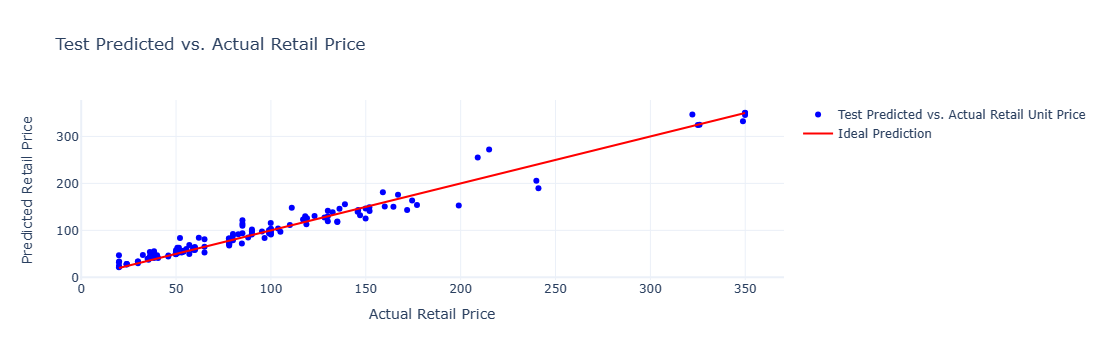

In [181]:
# Scatter plot of Predicted vs Actual Retail Price for test set
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_test, mode='markers', marker=dict(color='blue'),
                         name='Test Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines',
                         marker=dict(color='red'), name='Ideal Prediction'))
fig.update_layout(
    title='Test Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

<h2 align="center">Model Interpretation</h2>

After training the random forest regressor model with 50 estimators and using the scaled training data, we evaluated its performance using various metrics.

### R2 Score:
The R2 score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (unit price) that is predictable from the independent variables (features). A score of 0.992 on the training dataset and 0.962 on the testing dataset indicates that the model explains approximately 99.2% and 96.2% of the variance in unit price, respectively. These high R2 scores suggest that the model captures a significant amount of information about the target variable.

### Mean Absolute Error (MAE):
The MAE measures the average absolute difference between the predicted unit prices and the actual unit prices. A lower MAE indicates better model performance. The model achieved a MAE of 4.059 on the training dataset and 9.333 on the testing dataset. These relatively low MAE values suggest that the model's predictions are close to the actual unit prices, on average.

### Interpretation:
The high R2 scores and low MAE values demonstrate that the random forest regressor model performs exceptionally well in predicting optimal prices for retail products. The similar performance on both the training and testing datasets indicates that the model generalizes well to unseen data. Overall, the model's strong performance makes it a reliable tool for retail price optimization, providing valuable insights for pricing strategies and maximizing profitability.
